# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

Please input the name of a zipfile: ./readonly/small_img.zip
Opening archive, please wait a moment
Found  4 images in this archive.
Please input a search term: Christopher
Found -- Christopher -- in this image
<class 'numpy.ndarray'>
Found 8 Faces!
[INFO] Object found. Saving to memory.
[INFO] Object found. Saving to memory.
[INFO] Object found. Saving to memory.
[INFO] Object found. Saving to memory.
[INFO] Object found. Saving to memory.
[INFO] Object found. Saving to memory.
[INFO] Object found. Saving to memory.
[INFO] Object found. Saving to memory.


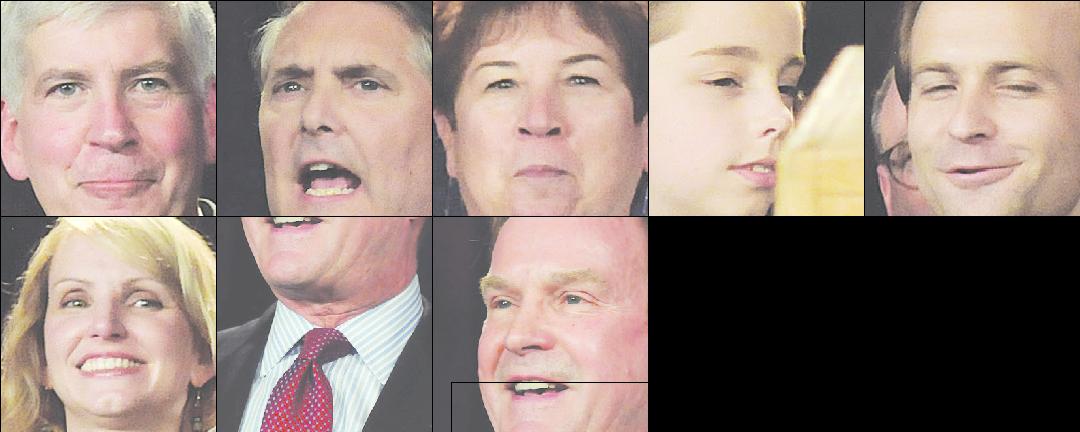

Couldn't find -- Christopher -- in this image
Couldn't find -- Christopher -- in this image
Found -- Christopher -- in this image
<class 'numpy.ndarray'>
Found 1 Faces!
[INFO] Object found. Saving to memory.


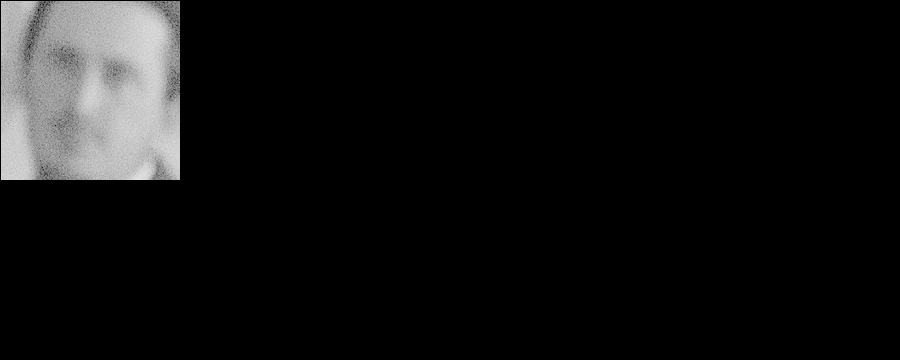

In [3]:
import zipfile

from PIL import Image
import pytesseract
from pytesseract import Output
import cv2
import numpy as np
from pathlib import Path

# loading the face detection classifier
##-- Auxiliary functions
#face_cascade = cv2.CascadeClassifier('readonly/haarcascade_frontalface_default.xml)
def word_search(search_im, search_txt):
    bw_im = get_grayscale(search_im)
    d = pytesseract.image_to_data(bw_im, output_type=Output.DICT)
    confirm_found = ""
    if search_txt in d['text']:
        print("Found --", search_txt, "-- in this image")
        confirm_found = True
    else:
        print("Couldn't find --", search_txt, "-- in this image")
        confirm_found = False
    return (confirm_found)

def extract_images (a_zipfile):
    pics_list = []
    with zipfile.ZipFile(a_zipfile, "r") as archive:
        for a_name in archive.namelist():
            im = Image.open(archive.open(a_name))
            pics_list.append({a_name:[im]})
    print("Found ", len(pics_list), "images in this archive.")
    return (pics_list)

def get_grayscale(image):
    return cv2.cvtColor(np.float32(image), cv2.COLOR_BGR2GRAY)

def cap_faces (a_picture):
    im = cv2.imread(a_picture)
    gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 
    print(type(gray_im))
    faceCascade = cv2.CascadeClassifier("readonly/haarcascade_frontalface_default.xml")
    faces = faceCascade.detectMultiScale(gray_im, scaleFactor=1.3, minNeighbors=3, minSize=(90,90))
    print ("Found {0} Faces!".format(len(faces)))
    return (faces)

def mk_facelist (face_data, pic_data):
    facelist = []
    pic = numpy.array(pic_data)
    for (x,y,w,h) in face_data:
        cv2.rectangle (pic, (x,y), (x + w, y + h), (0, 0, 0),0)
        roi_color = pic[y:y + h, x:x + w]
        #roi_color_final = cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB) ###Testing
        print("[INFO] Object found. Saving to memory.")
        facelist.append(Image.fromarray(roi_color))
    return (facelist)

def build_contactsheet(src_imgs):
    first_image = src_imgs[0]
    contact_sheet = Image.new(first_image.mode, (first_image.width*5, first_image.height*2))
    x=0
    y=0
    for an_img in src_imgs:
        if an_img.size != first_image.size:
            an_img=an_img.resize(first_image.size)
        contact_sheet.paste(an_img,(x,y))
        if x+first_image.width == contact_sheet.width:
            x = 0
            y = y + first_image.height
        else:
            x = x+first_image.width
    return (contact_sheet)

##--High level logic and flow
an_archive = input("Please input the name of a zipfile: ")
while Path(an_archive).is_file() == False:
    an_archive = input("Invalid zipfile name, please try again: ")
print("Opening archive, please wait a moment")
list_of_data = extract_images(an_archive)
search_term = input("Please input a search term: ")
for an_item in list_of_data:
    for entry in an_item:
        search_conf = ""
        im = an_item[entry][0]
        search_conf = word_search(im, search_term)
        if search_conf == True:
            im.save('temp.png')
            a_file = 'temp.png'
            faces_on_page = cap_faces(a_file)
            face_scraps = mk_facelist(faces_on_page, im)
            result_contactsheet = build_contactsheet(face_scraps)
            display(result_contactsheet)
                                     
# the rest is up to you!
